In [1]:
import pandas as pd
import numpy as np
import os
from meshparty import trimesh_io, trimesh_vtk, skeleton, utils
import vtk
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import time
from tqdm import tqdm

In [2]:
# setup the mesh meta to handle downloads and caching
mesh_dir = 'data/c3_cell_meshes/' # or change to your desired folder
seg_source = "precomputed://gs://h01-release/data/20210601/c3"
mm = trimesh_io.MeshMeta(cv_path=seg_source,
                         disk_cache_path=mesh_dir, 
                         cache_size=20)

In [3]:
cell_id_list = [28541451958,27843438291,4970736617,4489268853,3937466277,27216368299,36112421929]

#[5364977088]
#[28790152544,2950980117,5364977088]
#[36112421929,37015552275]
#[36112421929,36258519843,36681233232]
#[28541451958,27843438291,4970736617,4489268853,3937466277,27216368299,36112421929]

In [4]:
start_time = time.time()

for i in tqdm(range(len(cell_id_list)), desc="Downloading Meshes"):
    mesh_start_time = time.time()
    
    downloadmesh = mm.mesh(seg_id=cell_id_list[i], remove_duplicate_vertices=True)
    
    mesh_elapsed_time = time.time() - mesh_start_time
    minutes, seconds = divmod(mesh_elapsed_time, 60)
    print(f"Processed mesh for cell_id {cell_id_list[i]} in {int(minutes)} minutes and {int(seconds)} seconds")

total_elapsed_time = time.time() - start_time
total_minutes, total_seconds = divmod(total_elapsed_time, 60)
print(f"Total processing time: {int(total_minutes)} minutes and {int(total_seconds)} seconds")

Processed mesh for cell_id 28541451958 in 0 minutes and 17 seconds


Processed mesh for cell_id 27843438291 in 0 minutes and 2 seconds


Processed mesh for cell_id 4970736617 in 0 minutes and 2 seconds


Processed mesh for cell_id 4489268853 in 0 minutes and 1 seconds


Processed mesh for cell_id 3937466277 in 0 minutes and 1 seconds


Processed mesh for cell_id 27216368299 in 0 minutes and 2 seconds
Processed mesh for cell_id 36112421929 in 0 minutes and 0 seconds


Total processing time: 0 minutes and 27 seconds


In [5]:
# make a dictionary to hold the mesh file for each cell id in the list

mesh_dictionary = {}
for i in range(len(cell_id_list)):
    mesh_file = os.path.join(mesh_dir, str(cell_id_list[i]) + '_0' + '.h5')
    mesh_dictionary['cell_' + str(i)] = mm.mesh(filename = mesh_file)

In [6]:
mesh_dictionary

{'cell_0': <trimesh.Mesh(vertices.shape=(27214859, 3), faces.shape=(55029816, 3))>,
 'cell_1': <trimesh.Mesh(vertices.shape=(4156781, 3), faces.shape=(8342897, 3))>,
 'cell_2': <trimesh.Mesh(vertices.shape=(5590730, 3), faces.shape=(11187347, 3))>,
 'cell_3': <trimesh.Mesh(vertices.shape=(2455092, 3), faces.shape=(4899844, 3))>,
 'cell_4': <trimesh.Mesh(vertices.shape=(3236594, 3), faces.shape=(6471069, 3))>,
 'cell_5': <trimesh.Mesh(vertices.shape=(4309847, 3), faces.shape=(8666809, 3))>,
 'cell_6': <trimesh.Mesh(vertices.shape=(352543, 3), faces.shape=(699345, 3))>}

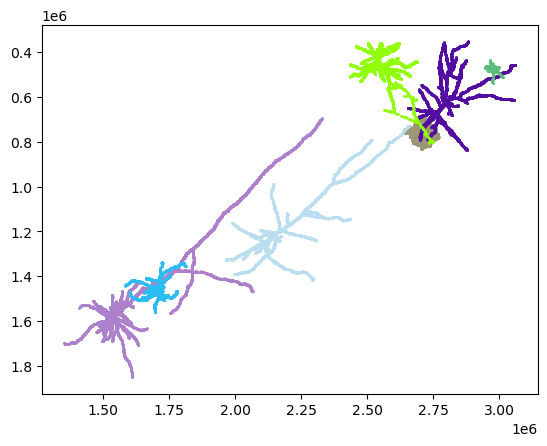

In [7]:
cell_gran = 1000
cell_opac = 1

fig, ax = plt.subplots()

for cellid in range(len(mesh_dictionary)):
    cell_key = 'cell_' + str(cellid)
    mesh = mesh_dictionary[cell_key]
    random_color = np.random.rand(3,)
    
    ax.scatter(
        mesh.vertices[::cell_gran, 0],
        mesh.vertices[::cell_gran, 1],
        s=1, 
        alpha=cell_opac, 
        color=random_color
    )

ax.invert_yaxis()  # Reverse the y-axis

plt.show()


In [8]:
cell_gran = 1000
cell_opac = 1

fig = go.Figure()

for cellid in range(len(mesh_dictionary)):
    cell_key = 'cell_' + str(cellid)
    mesh = mesh_dictionary[cell_key]
    random_color = np.random.rand(3,)
    
    fig.add_trace(go.Scatter3d(
        x=mesh.vertices[::cell_gran, 0],
        y=mesh.vertices[::cell_gran, 1],
        z=mesh.vertices[::cell_gran, 2],
        mode='markers',
        marker=dict(size=1, opacity=cell_opac, color='rgb({}, {}, {})'.format(*random_color)),
        hoverinfo='none',
        showlegend=False
    ))

# Set the camera view
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=0, y=0.5, z=1)  # Adjust these values to match the view in your screenshot
)

fig.update_layout(
    scene=dict(
        xaxis=dict(autorange='reversed'),  # Reverse the x-axis
        aspectmode='manual',
        aspectratio=dict(x=1, y=1, z=0.2),  # Compress the z-axis
        camera=camera
    ),
     dragmode='orbit'  # Set default interaction mode to orbital rotation
)

fig.show()
